# Tutorial 1.2. Wind Profile Generation Along the Height of a Structure

### Description: The design wind speed computed from example 1.1 is at the reference location. The variation of the wind load along the height of the structure is explained in this tutorial. The wind profile depends on the terrain at which it is located. Norm-based formulas are introduced. A distinction should be made between (10 min) mean and (3 s) gust wind profiles.  Some exercises are proposed. 

#### Students are advised to complete the exercises. 

Project: Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek
        
Author: kodakkal.anoop@tum.de, mate.pentek@tum.de

Created on:  30.11.2015

Last update: 17.10.2018

##### Contents:

 Wind profile - the variation of (a certain) wind speed (component) along the height of the structure - for the building at Terrain category I and IV


In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np

#### Gust wind speed computed from previous example for Jeddah airport location for a return period of 50 years is 40.12 m/s^2. The mean wind speed is computed as

In [2]:
gust_windspeed = 38.19
# 1.4 is the approximate factor to convert from gust to mean wind speed 
mean_windspeed = gust_windspeed/1.4 

According to [EN 1991-1-4: Eurocode: Actions on structures - Part 1-4: General actions - Wind actions](https://archive.org/details/en.1991.1.4.2005/page/n17)
            
1. (1.6.1) fundamental basic wind velocity $v_{b,0}$: the 10 minute mean wind velocity with an annual risk of being exceeded of 0.02, irrespective of wind direction, at a height of 10m above flat open country terrain and accounting for altitude effects (if required) 
            
2. (1.6.2) basic wind velocity $v_b$: the fundamental basic wind velocity modified to account for the direction of the wind being considered and the season (if required) 
            
3. (1.6.3) mean wind velocity $v_m$: the basic wind velocity modified to account for the effect of terrain roughness and orography 

Note that the various coefficients are provided in the national annexes. Sometimes these are all 1.0 leading to identical values for the above distinct quantitites.

Two terrain categories are assumed in this exercise.
1. The building is located at the seaside: __Terrain category I__
2. The building is located at an urban area with height of adjacent building upto 15m: __Terrain category IV__

Let's calculate the design wind and pressure values for 200m tall building having a uniform square cross section of 30 m * 30 m. 


In [3]:
height_total = 200
storey_height = 4 # height of each floor 
air_density = 1.2 # airdensity in kg/m3
height = np.arange(0, height_total, storey_height)

###### Let's compute for terrain category I

According to EN 1991-1-4 the wind profile for terrain category I is 

$$ u_{mean}(z) = 1.18 \times v_b \times (z/10)^{0,12}$$ 

$$ u_{gust}(z) = 1.61 \times v_b \times (z/10)^{0,095}$$ 

The gust wind pressure along the height can be determined as

$$ q_{gust}(z) = 1/2 * \rho_{air} \times u_{gust}^2(z)$$ 

In [4]:
a_mean_1  = 1.18
alpha_mean_1 = 0.12
a_gust_1 = 1.61
alpha_gust_1 = 0.095

umean_1 = a_mean_1 * mean_windspeed * (height/10)** alpha_mean_1
ugust_1 = a_gust_1 * mean_windspeed * (height/10)** alpha_gust_1
qgust_1 = 0.5 * air_density * ugust_1**2

###### Let us plot

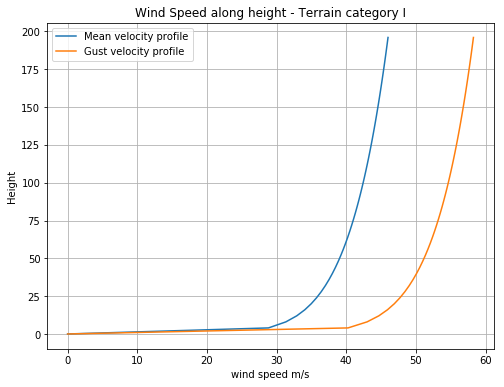

In [5]:
plt.figure(num=1, figsize=(8, 6))
plt.plot(umean_1, height, label = 'Mean velocity profile')
plt.plot(ugust_1, height, label = 'Gust velocity profile')
plt.ylabel('Height')
plt.xlabel('wind speed m/s')
plt.title('Wind Speed along height - Terrain category I')
plt.legend()
plt.grid(True)

###### Let us compute for terrain category IV

According to EN 1991-1-4 the wind profile for terrain category IV is 

$$ u_{mean}(z) = 0.56 \times v_b \times (z/10)^{0.3}$$ 

$$ u_{gust}(z) = 1.05 \times v_b \times (z/10)^{0.2}$$ 

In [6]:
a_mean_4  = 0.56
alpha_mean_4 = 0.3
a_gust_4 = 1.05
alpha_gust_4 = 0.2

umean_4 = a_mean_4 * mean_windspeed * (height/10)**alpha_mean_4
ugust_4 = a_gust_4 * mean_windspeed * (height/10)**alpha_gust_4
qgust_4 = 0.5 * air_density * ugust_4**2

###### Let us plot

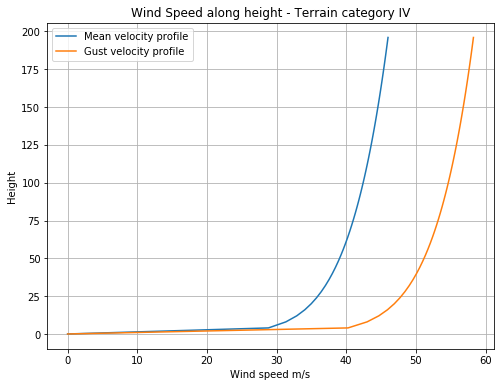

In [7]:
plt.figure(num=2, figsize=(8, 6))
plt.plot(umean_1, height, label = 'Mean velocity profile')
plt.plot(ugust_1, height, label = 'Gust velocity profile')
plt.ylabel('Height')
plt.xlabel('Wind speed m/s')
plt.title('Wind Speed along height - Terrain category IV')
plt.legend()
plt.grid(True)

plt.show()

### Exercise: Wind profile generation for Jeddah airport

For the given data of Jeddah airport compute the mean and guest wind speed profiles for two terrrain categories. Make necessary changes in block 2.

## Check Point: Discussion

#### Discuss amoung groups the observations regarding the generation of wind profiles.